In [20]:
#importing packages
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

#read the csv
df = pd.read_csv("AdultData.csv",sep = None, engine = 'python',header = None, decimal = '.', names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income' ]  )
#read the columns 
df.dtypes
#checking the count of the columns
df.count()
#checking age range first
dfAge = df['age']
dfAgeRangeCheck = dfAge.between(16,100)
dfAgeRangeCheck[dfAgeRangeCheck[:] == False]
#no value that is outside of range 16 and 100
#Next to check the workclass
df['workclass'].value_counts()
#number of missing values
mv=1836
#remove whitespace
df['workclass']=df['workclass'].str.strip()
#total counts of dataset
df.count()
#calculate the percentage of missing values
p = (1836.0/32561)
#p=0.056 which means only 5.6% values have missed. It is very insignificant, so we will drop them
df = df[df["workclass"] != "?" ]
# we can see that there are a few missing values
#Next is fnlwgt
dfFinalWeight = df['fnlwgt']
df[df['fnlwgt'].isnull()]
#continuous variable with no nulls
#Next is education
dfEducation = df['education']
dfEducation.value_counts()
#check No nulls
df[dfEducation.isnull()]
#no nulls next is education-num
dfEducationNum = df['education-num']
dfEducationNum.value_counts()
#no null variables
#Next is marital-status
dfMaritalStatus = df['marital-status']
dfMaritalStatus.value_counts()
#no missing variables. Onto occupation
df['occupation'].value_counts()
#total number of missing values
mv=mv+7
#remove whitespace
df['occupation']=df['occupation'].str.strip()
#total counts of dataset
df.count()
#calculate the percentage of missing values
p = (7.0/30725)
#p=0.00022 which means only 5.6% values have missed. It is very insignificant, so we will drop them
df = df[df["occupation"] != "?" ]
#next is relationship
dfRelationship = df['relationship']
dfRelationship.value_counts()
#no missing values,
#next we move onto race
dfRace = df['race']
dfRace.value_counts()
#no missing values, so onto the next variable 
dfSex = df['sex']
dfSex.value_counts()
#no missing variables, so onto the next of capital-gain 0 or above
dfCapitalGain = df['capital-gain']
dfCapitalGainCheck = dfCapitalGain.between(0,999999)
dfCapitalGainCheck[dfCapitalGainCheck[:] == False]
#capital-loss check 0 or above
dfCapitalLoss = df['capital-loss']
dfCapitalLossCheck = dfCapitalLoss.between(0,999999)
dfCapitalLossCheck[dfCapitalLossCheck[:] == False]
#checking if hours per week is at least 0 and above
dfHoursPerWeek = df['hours-per-week']
dfHoursPerWeekCheck = dfHoursPerWeek.between(0,9999999)
dfHoursPerWeekCheck[dfHoursPerWeekCheck[:] == False]
#checking native countries, 556 records of '?' values
df['native-country'].value_counts()
#total number of missing values
mv=mv+556
#remove whitespace
df['native-country']=df['native-country'].str.strip()
#total counts of dataset, total records is 30178
df.count()
#calculate the percentage of missing values
p = (556.0/30178)
#p=0.0184 which means only 5.6% values have missed. It is very insignificant, so we will drop them
df = df[df["native-country"] != "?" ]
print(df.head(5))


   age         workclass  fnlwgt   education  education-num  \
0   39         State-gov   77516   Bachelors             13   
1   50  Self-emp-not-inc   83311   Bachelors             13   
2   38           Private  215646     HS-grad              9   
3   53           Private  234721        11th              7   
4   28           Private  338409   Bachelors             13   

        marital-status         occupation    relationship    race      sex  \
0        Never-married       Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse    Exec-managerial         Husband   White     Male   
2             Divorced  Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse  Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse     Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States   <=50K  
1         



Without KFold cross validation and tweaking parameters
test size 50%
[[9589 1706]
 [1750 2036]]
              precision    recall  f1-score   support

       <=50K       0.85      0.85      0.85     11295
        >50K       0.54      0.54      0.54      3786

   micro avg       0.77      0.77      0.77     15081
   macro avg       0.69      0.69      0.69     15081
weighted avg       0.77      0.77      0.77     15081

Searching for highest cross validation score for depth between 3 and 50


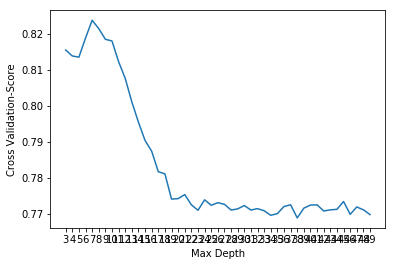

Index: 7
Cross Validation Score: 0.823817659911442


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
abc = ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex','hours-per-week', 'native-country' ]
#getting the specific attributes
X = df.iloc[:,[0,1,3,4,5,6,7,8,9,12,13]].values
#income attribute as the class label
Z = pd.DataFrame(X)

#T = df.iloc[:,[14]]

"""X is 10 columns
Age, workclass, education, education-num, marital-status, 
occupation, relationship, race, sex, hours-per-week, native-country,
"""
#import labelencoder  for converting categorical variables
#to numerical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
#column workclass
X[:,1] = labelencoder_X.fit_transform(X[:,1])
#column education
X[:,2] = labelencoder_X.fit_transform(X[:,2])
#column education-num
X[:,3] = labelencoder_X.fit_transform(X[:,3])
#column marital-status
X[:,4] = labelencoder_X.fit_transform(X[:,4])
#column occupation
X[:,5] = labelencoder_X.fit_transform(X[:,5])
#column relationship
X[:,6] = labelencoder_X.fit_transform(X[:,6])
#column race
X[:,7] = labelencoder_X.fit_transform(X[:,7])
#column sex
X[:,8] = labelencoder_X.fit_transform(X[:,8])
#column native-country
X[:,10] = labelencoder_X.fit_transform(X[:,10])

#new dataframe with categorical variables changed to numerical 
Z = pd.DataFrame(X)

#getting all the feature columns
feature_cols = [0,1,2,3,4,5,6,7,8,9,10]

#A dataframe contains all the feature columns
A = Z[feature_cols]

#B contains the class label
B = df['income']

#convert into numpy array for decisiont tree classifier and validation
featureA = A.values
featureB = B.values


print ("\n\nWithout KFold cross validation and tweaking parameters")
print("test size 50%")
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.5, random_state=0)
#running default tree classifier to see results 
clf = DecisionTreeClassifier(criterion='gini')

fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)


#displa y confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

#display classification report
from sklearn.metrics import classification_report
print classification_report(y_test, y_pre)



#CONTINUE EXPLORING FROM HERE DEPTH
#************************************************************************************************************

print("Searching for highest cross validation score for depth between 3 and 50")
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.5)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#loop from 3 to 50, changing the max depth and running through a cross validation score with 10 folds
#here we get the mean and add to a depthvalue list
#we attempt to find the best depth for use as our parameter
depthValue = []
for i in range(3,50):
    dTC = DecisionTreeClassifier(max_depth = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    depthValue.append((scores.mean()))
    
#plotting a density graph on the cross validation score to determine
#the best max value
plt.plot(range(3,50),depthValue)
plt.xlabel('Max Depth')
plt.xticks(np.arange(3, 50, 1.0))
plt.ylabel('Cross Validation-Score')
plt.show()


maxDepthIndex = depthValue.index(max(depthValue))
#assigning variable for final prediction index
print "Index: " +str(maxDepthIndex+3) 
print("Cross Validation Score: " + str(depthValue[maxDepthIndex]))
#the actual depth for assigning later
bestDepthValue = maxDepthIndex+3



Searching for highest cross validation score for a certain min samples split between 0 and 300


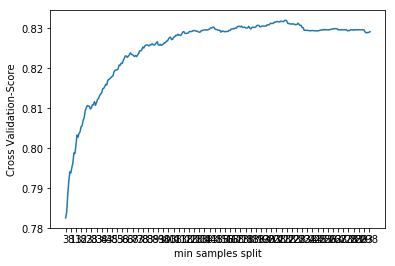

Index: 217
Cross Validation Score: 0.8320399135656595


In [22]:
#MIN SAMPLES SPLIT
print "Searching for highest cross validation score for a certain min samples split between 0 and 300"
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.5)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#same thing with the depth but on the minimum samples split
minSampleValue = []
for i in range(3,300):
    dTC = DecisionTreeClassifier( min_samples_split = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    minSampleValue.append((scores.mean()))
    
plt.plot(range(3,300),minSampleValue)
plt.xlabel('min samples split')
plt.xticks(np.arange(3, 300, 5)) 
plt.ylabel('Cross Validation-Score')
plt.show()


minIndex = minSampleValue.index(max(minSampleValue))
print "Index: "+ str(minIndex+3)
print("Cross Validation Score: " + str(minSampleValue[minIndex]))


#assigning variable for final prediction min samples split
bestMinSamplesSplitValue = minIndex + 3

In [23]:
#With new parameters 
print ("\n\nWith Tweaked paramters")
# Split dataset into training set and test set 50%
X_train, X_test, y_train, y_test = train_test_split(featureA, featureB, test_size=0.5, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', max_depth = bestDepthValue, min_samples_split = bestMinSamplesSplitValue)

fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)




from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

from sklearn.metrics import classification_report
print classification_report(y_test, y_pre)





With Tweaked paramters
[[10341   954]
 [ 1680  2106]]
              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89     11295
        >50K       0.69      0.56      0.62      3786

   micro avg       0.83      0.83      0.83     15081
   macro avg       0.77      0.74      0.75     15081
weighted avg       0.82      0.83      0.82     15081



Searching for highest cross validation score for depth between 3 and 50
Test Size: 40%


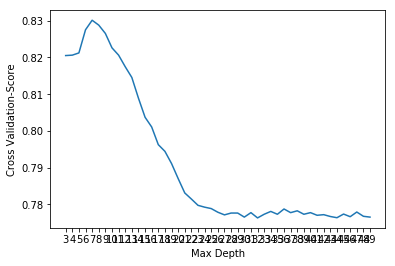

Index: 7
Cross Validation Score: 0.8301370373424468


In [24]:
#CONTINUE EXPLORING FROM HERE DEPTH
#************************************************************************************************************

print("Searching for highest cross validation score for depth between 3 and 50")
print "Test Size: 40%"
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.4)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#loop from 3 to 50, changing the max depth and running through a cross validation score with 10 folds
#here we get the mean and add to a depthvalue list
#we attempt to find the best depth for use as our parameter
depthValue = []
for i in range(3,50):
    dTC = DecisionTreeClassifier(max_depth = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    depthValue.append((scores.mean()))
    
#plotting a density graph on the cross validation score to determine
#the best max value
plt.plot(range(3,50),depthValue)
plt.xlabel('Max Depth')
plt.xticks(np.arange(3, 50, 1.0))
plt.ylabel('Cross Validation-Score')
plt.show()


maxDepthIndex = depthValue.index(max(depthValue))
#assigning variable for final prediction index
print "Index: " +str(maxDepthIndex+3) 
print("Cross Validation Score: " + str(depthValue[maxDepthIndex]))
#the actual depth for assigning later
bestDepthValue = maxDepthIndex+3


Searching for highest cross validation score for a certain min samples split between 0 and 300


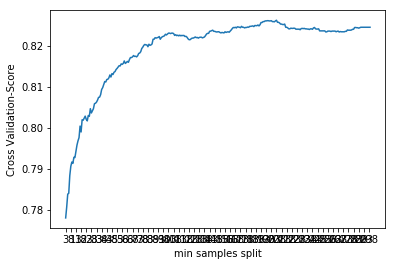

Index: 208
Cross Validation Score: 0.8262696951094741


In [25]:
#MIN SAMPLES SPLIT
print "Searching for highest cross validation score for a certain min samples split between 0 and 300"
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.4)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#same thing with the depth but on the minimum samples split
minSampleValue = []
for i in range(3,300):
    dTC = DecisionTreeClassifier( min_samples_split = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    minSampleValue.append((scores.mean()))
    
plt.plot(range(3,300),minSampleValue)
plt.xlabel('min samples split')
plt.xticks(np.arange(3, 300, 5)) 
plt.ylabel('Cross Validation-Score')
plt.show()


minIndex = minSampleValue.index(max(minSampleValue))
print "Index: "+ str(minIndex+3)
print("Cross Validation Score: " + str(minSampleValue[minIndex]))


#assigning variable for final prediction min samples split
bestMinSamplesSplitValue = minIndex + 3

In [26]:
#With new parameters 
print ("\n\nWith Tweaked paramters")
# Split dataset into training set and test set 40%
X_train, X_test, y_train, y_test = train_test_split(featureA, featureB, test_size=0.4, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', max_depth = bestDepthValue, min_samples_split = bestMinSamplesSplitValue)

fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)




from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

from sklearn.metrics import classification_report
print classification_report(y_test, y_pre)





With Tweaked paramters
[[8230  813]
 [1301 1721]]
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      9043
        >50K       0.68      0.57      0.62      3022

   micro avg       0.82      0.82      0.82     12065
   macro avg       0.77      0.74      0.75     12065
weighted avg       0.82      0.82      0.82     12065



Searching for highest cross validation score for depth between 3 and 50
Test Size: 20%


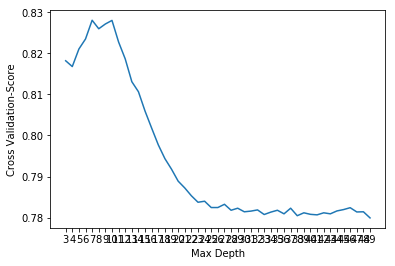

Index: 7
Cross Validation Score: 0.828048818622731


In [27]:
#CONTINUE EXPLORING FROM HERE DEPTH
#************************************************************************************************************

print("Searching for highest cross validation score for depth between 3 and 50")
print "Test Size: 20%"
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.2)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#loop from 3 to 50, changing the max depth and running through a cross validation score with 10 folds
#here we get the mean and add to a depthvalue list
#we attempt to find the best depth for use as our parameter
depthValue = []
for i in range(3,50):
    dTC = DecisionTreeClassifier(max_depth = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    depthValue.append((scores.mean()))
    
#plotting a density graph on the cross validation score to determine
#the best max value
plt.plot(range(3,50),depthValue)
plt.xlabel('Max Depth')
plt.xticks(np.arange(3, 50, 1.0))
plt.ylabel('Cross Validation-Score')
plt.show()


maxDepthIndex = depthValue.index(max(depthValue))
#assigning variable for final prediction index
print "Index: " +str(maxDepthIndex+3) 
print("Cross Validation Score: " + str(depthValue[maxDepthIndex]))
#the actual depth for assigning later
bestDepthValue = maxDepthIndex+3


In [ ]:
#MIN SAMPLES SPLIT
print "Searching for highest cross validation score for a certain min samples split between 0 and 300"
train_X, test_X, train_y, test_y = train_test_split(featureA,featureB,test_size = 0.2)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#same thing with the depth but on the minimum samples split
minSampleValue = []
for i in range(3,300):
    dTC = DecisionTreeClassifier( min_samples_split = i)
    scores = cross_val_score(dTC, train_X, train_y, cv = 10, n_jobs = 4)
    minSampleValue.append((scores.mean()))
    
plt.plot(range(3,300),minSampleValue)
plt.xlabel('min samples split')
plt.xticks(np.arange(3, 300, 5)) 
plt.ylabel('Cross Validation-Score')
plt.show()


minIndex = minSampleValue.index(max(minSampleValue))
print "Index: "+ str(minIndex+3)
print("Cross Validation Score: " + str(minSampleValue[minIndex]))


#assigning variable for final prediction min samples split
bestMinSamplesSplitValue = minIndex + 3

Searching for highest cross validation score for a certain min samples split between 0 and 300


In [ ]:
#With new parameters 
print ("\n\nWith Tweaked paramters")
# Split dataset into training set and test set 40%
X_train, X_test, y_train, y_test = train_test_split(featureA, featureB, test_size=0.2, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', max_depth = bestDepthValue, min_samples_split = bestMinSamplesSplitValue)

fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)




from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

from sklearn.metrics import classification_report
print classification_report(y_test, y_pre)

